# GARCH

**Generalized AutoRegressive Conditional Heteroskedasticity (GARCH) is a financial analysis tool that uses autoregression and moving average processes to model stock returns. In particular, it models the *volatility clustering* in a finance time series.**

**The S&P 500 dataset for this exercise contains approx. nine years of daily SPY values from 4th January 2010 to 28th December 2018. Using this dataset, build a GARCH model using `arch_model()` function available from arch library.**

**NOTE: Stock returns can be calculated by 'differencing' the close stock prices. Take the log of the stock returns to get the log returns.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from arch import arch_model

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

In [2]:
df = pd.read_csv('data/SPY.csv', parse_dates=True, index_col='Date')

In [3]:
# Note - timeline is actually trading days, not calendar days

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [4]:
# Log returns (time series you want to model)

df['LogRet'] = np.log(df['Close']).diff()

In [5]:
# Note the null value from diffing

df.head()

,Open,High,Low,Close,Adj Close,Volume,LogRet
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.002644
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.004212
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.003322


In [6]:
# Filter out 1st row since it had no previous value for stock return

df2 = df.iloc[1:].copy()

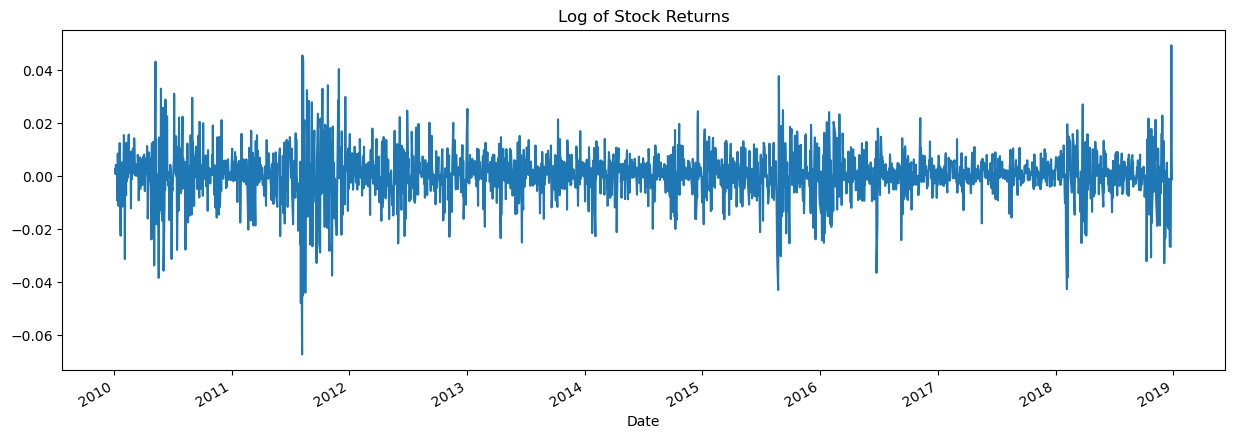

In [7]:
df2['LogRet'].plot(figsize=(15, 5))
plt.title("Log of Stock Returns");

**There is a lot of volatility clustering. Every time the return has a large magnitude, either negative or positive, it is surrounded by other returns of large magnitude. They look like shocks in a cardio system - a big stimulus that then tapers off over time.**

In [8]:
# Squared log returns (remove negatives)

df2['Ysq'] = df['LogRet'] ** 2

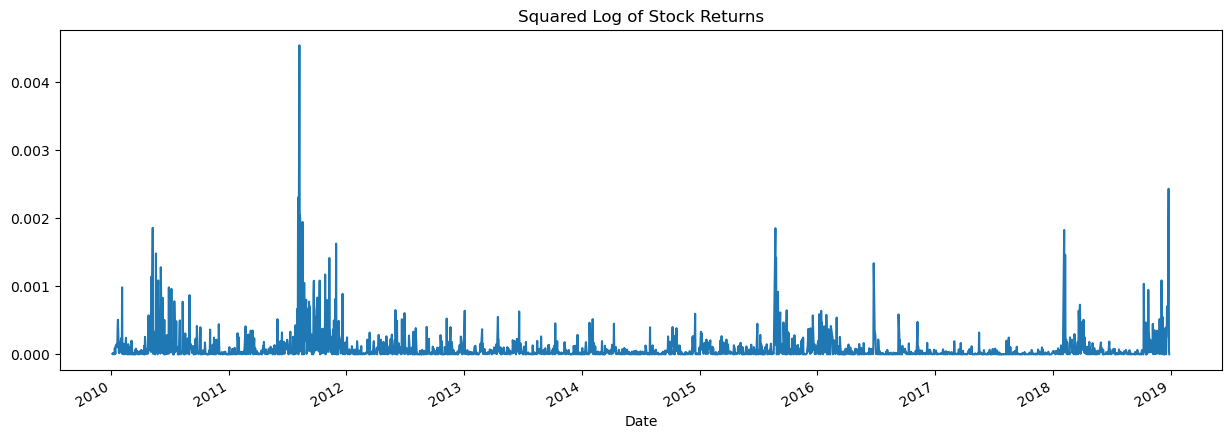

In [9]:
df2['Ysq'].plot(figsize=(15, 5))
plt.title("Squared Log of Stock Returns");

**This makes it easier to see the clustering of large values. When the returns get large, they are usually followed by large returns.**

## ACF and PACF

**To see autocorrelation between time lags in a time series, it is always best to use StatsModel API. Plot the ACF and PACF for the log returns and log returns squared, to confirm volatiltity clustering.**

**The ACF and PACF for log returns should not show any correlation, but ACF and PACF for squared log returns will show significant lags if there is volatility clustering.**

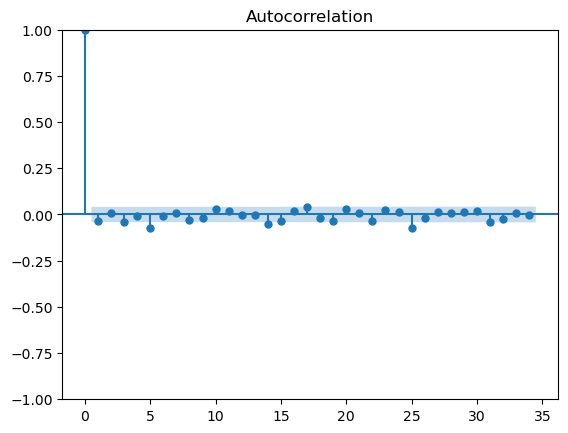

In [10]:
plot_acf(df2['LogRet']);

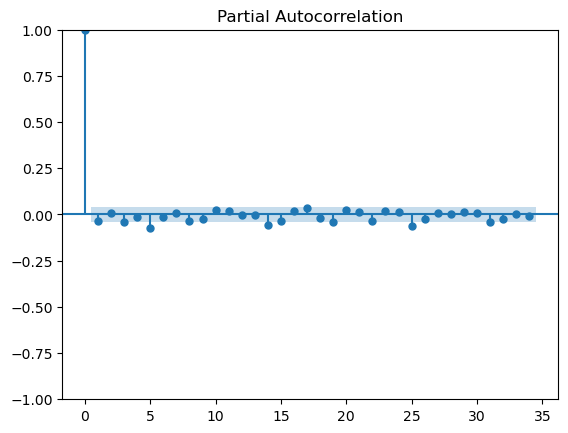

In [11]:
plot_pacf(df2['LogRet']);

**As expected with the log returns, there are no statistically significant lags in the time series.**

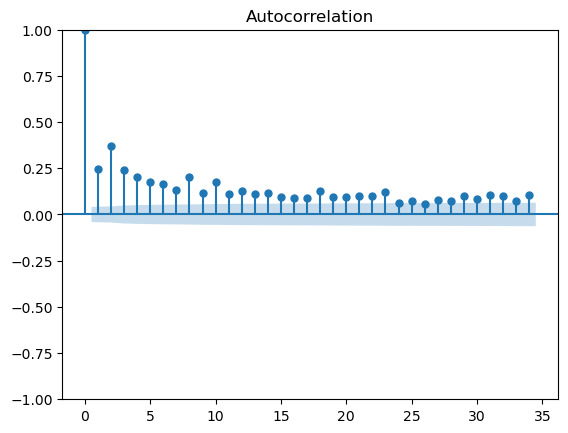

In [12]:
plot_acf(df2['Ysq']);

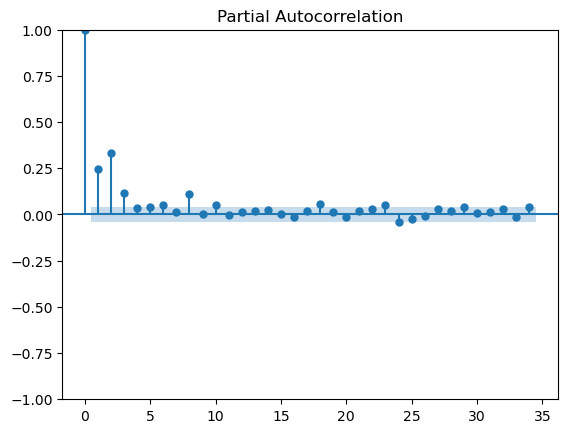

In [13]:
plot_pacf(df2['Ysq']);

**For squared log returns, there are now many significant lags in the ACF plot (upto 23 lags), telling us there is significant correlation in the time series.**

**The PACF shows that there is significant partial correlation upto 3 lags.**

**Lets compare to ACF and PACF for the square of Gaussian noise data, i.e. a random walk:**

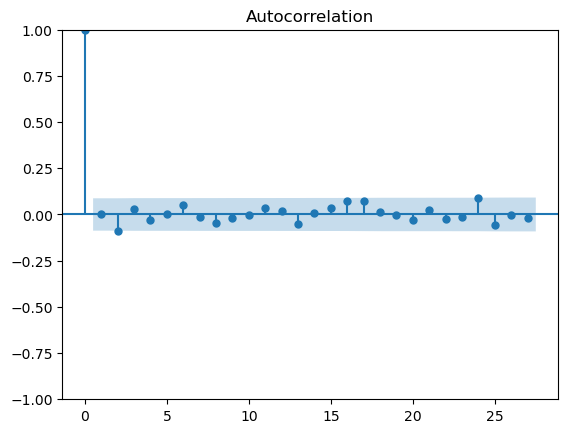

In [14]:
# Plot ACF and PACF for random noise

noise_sq = np.random.randn(500) ** 2

plot_acf(noise_sq);

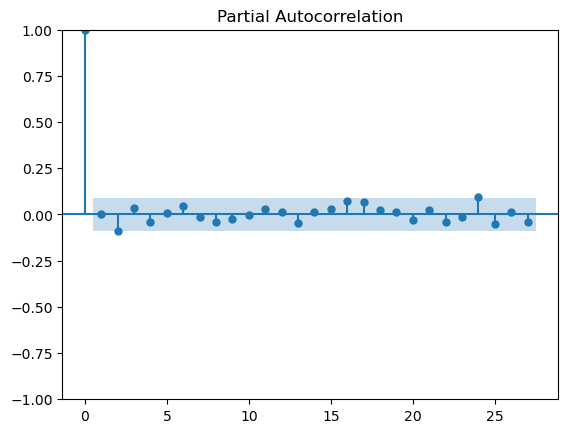

In [15]:
plot_pacf(noise_sq);

**With this, you can confirm that the squared log returns are not like a random walk or Gaussian noise, because even squaring the Gaussian noise shows no correlation, i.e. no matter how you transform it, there will be no significant lags in a random walk. Therefore, we can confirm that there is volatility clustering in stock returns that is predictable.**

## Prepare data

**If you build the GARCH model without any 'scaling' of the time series, a warning error will be raised.**

In [16]:
# Create training and test sets

Ntest = 500

train = df2.iloc[:-Ntest][['LogRet']].copy()
test = df2.iloc[-Ntest:][['LogRet']].copy()

In [17]:
train.shape, test.shape

((1762, 1), (500, 1))

In [18]:
# Buid model without scaling data

model = arch_model(train['LogRet'], vol='GARCH', p=1, q=1)

In [19]:
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2668736234320.392
Iteration:      2,   Func. Count:     19,   Neg. LLF: 681495796603480.8
Iteration:      3,   Func. Count:     34,   Neg. LLF: 1.701275578709206e+17
Iteration:      4,   Func. Count:     49,   Neg. LLF: 2738160030335964.0
Iteration:      5,   Func. Count:     64,   Neg. LLF: 8664947886705.216
Iteration:      6,   Func. Count:     77,   Neg. LLF: 2451829078945330.0
Iteration:      7,   Func. Count:     92,   Neg. LLF: 76114823394.09409
Iteration:      8,   Func. Count:    105,   Neg. LLF: 2563086217141354.5
Iteration:      9,   Func. Count:    120,   Neg. LLF: 1650926299360767.0
Iteration:     10,   Func. Count:    134,   Neg. LLF: 2550553656242445.5
Iteration:     11,   Func. Count:    149,   Neg. LLF: 302124127038.29663
Iteration:     12,   Func. Count:    162,   Neg. LLF: 233849128707815.16
Iteration:     13,   Func. Count:    177,   Neg. LLF: 5260361271.772977
Iteration:     14,   Func. Count:    190,   Neg. LLF:

C:\Users\shmel\Anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.532e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


**'Scale' the data by subtracting the mean and dividing by the standard deviation of the training set. Remember to scale both training and test sets.**

In [20]:
m = train['LogRet'].mean()
s = train['LogRet'].std()

train['Scaled'] = (train['LogRet'] - m) / s
test['Scaled'] = (test['LogRet'] - m) / s

df2['Scaled'] = (df2['LogRet'] - m) / s

## ARCH(1) model

In [21]:
arch1 = arch_model(train['Scaled'], vol='ARCH', p=1)

In [22]:
# Update_freq defines how often the function prints out the loss 

res_arch1 = arch1.fit(update_freq=10)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2457.9840288310843
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 6


In [23]:
res_arch1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2457.98
Distribution:                  Normal   AIC:                           4921.97
Method:            Maximum Likelihood   BIC:                           4938.39
                                        No. Observations:                 1762
Date:                Fri, Oct 13 2023   Df Residuals:                     1761
Time:                        08:24:01   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0127  2.325e-02      0.545      0.586 [-3.291e-02,5.825e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.8188  6.722e-02     12.181  3.936e-34   [  0.687,  0.951]
alpha[1]       0.1771  4.774e-02      3.709  2.079e-04 [8.350e-02,  0.271]
==========================================================================

Covariance estimator: robust
"""

**Note that the p-value for the mean model is quite large (0.586). The confidence interval contains both negative and positive values, which means there is 95% confidence that the true mean is zero thus confirming p-value higher than 0.05.**

**The volatility model uses `omega` as its bias term and `alpha[1]` as its coefficient. Note that both of these have highly significant p-values (very small).**

**Make a note of the final Log Likelihood and AIC scores - compare to other models as performance metrics. The log likelihood should increase and the AIC should decrease.**

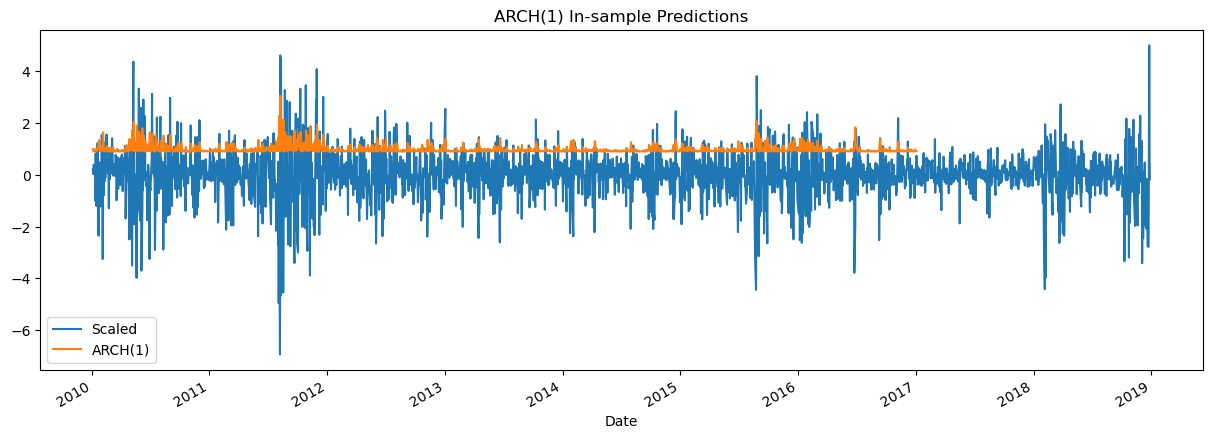

In [24]:
# Plot training predictions against scaled data

df2['ARCH(1)'] = res_arch1.conditional_volatility

df2[['Scaled', 'ARCH(1)']].plot(figsize=(15, 5))
plt.title("ARCH(1) In-sample Predictions");

**The fit seems OK but it underestimates when the value are large, and overestimates when the values are small.**

**When predicting with the model, you can just forecast into the future, i.e. you do not need the other function parameters, but remember that `reindex` default setting is False, which means that predictions are returned for the forecast horizon only. If you set to True, results will be returned for the entire training set.**

In [25]:
fcast_arch1 = res_arch1.forecast(horizon=Ntest, reindex=True)

In [26]:
# Returns forecast object

fcast_arch1

In [27]:
fcast_arch1.mean

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The mean forecast shows the entire training set with null values except for the last row, because you did not specify a start date for the `start` parameter when forecasting. The model assumes you only want to forecast from the end of the training set.**

**Also note that all the mean values are the same (0.012671) because you chose a 'Constant' mean model.**

In [28]:
fcast_arch1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The variance forecast again shows the entire training set with null values except for the last row.**

In [29]:
fcast_arch1.residual_variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The residual variance shows the entire training set as null values except for the last row, and it shows the same values as the variance, because you used a 'Constant' mean model. The same would have happened if you selected 'Zero' mean model.**

**Lets see what happens if you set `reindex` to False, i.e. only show the last row:**

In [30]:
fcast_arch1 = res_arch1.forecast(horizon=Ntest, reindex=False)

In [31]:
fcast_arch1.mean

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,...,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671,0.012671


In [32]:
fcast_arch1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.912612,0.98042,0.992427,0.994553,0.994929,0.994996,0.995008,0.99501,0.99501,0.99501,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501


**Now the mean and variance only shows the rows with values, i.e. no null rows. Since there was no start date selected when forecasting, so only the last row in the training set is used, but they are the same values as before.**

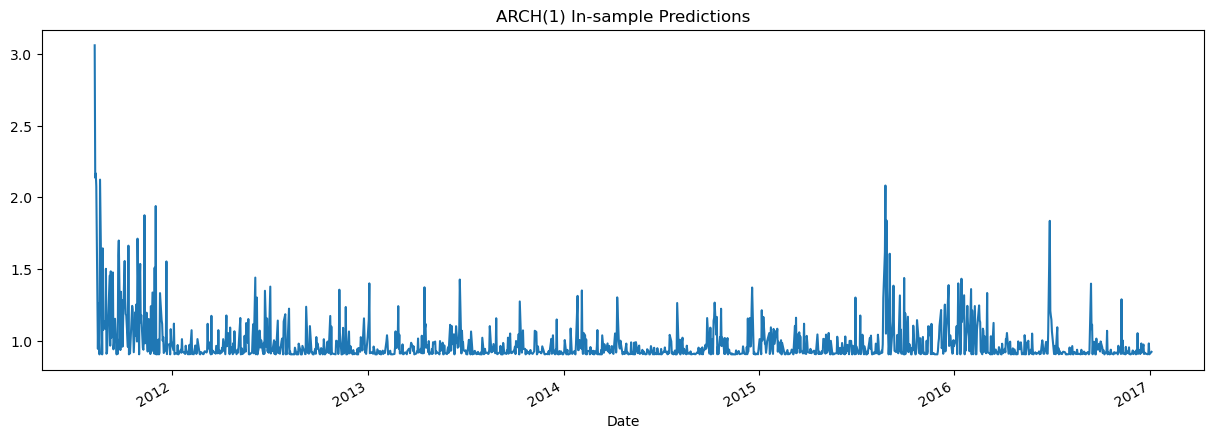

In [33]:
# Plot training predictions from 9th Aug 2011

df2.loc['2011-08-09':]['ARCH(1)'].plot(figsize=(15, 5))
plt.title("ARCH(1) In-sample Predictions");

**The reason that the plot starts from 9th Aug 2011 is because there is a huge return on that day compared to the others. How does the forecast evolve over time, starting from this date?**

In [34]:
# Add start date of 1st Aug 2011 for predictions

fcast_arch1 = res_arch1.forecast(horizon=Ntest, reindex=True, start='2011-08-01')

In [35]:
# Predicted variance upto the date of huge return

fcast_arch1.variance['2011-07-28':'2011-08-10']

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,0.861165,0.971311,0.990814,0.994267,0.994879,0.994987,0.995006,0.995009,0.995010,0.995010,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-02,2.112095,1.192807,1.030033,1.001211,0.996108,0.995205,0.995045,0.995016,0.995011,0.995010,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-03,0.863233,0.971677,0.990879,0.994279,0.994881,0.994987,0.995006,0.995009,0.995010,0.995010,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-04,5.183712,1.736683,1.126334,1.018263,0.999127,0.995739,0.995139,0.995033,0.995014,0.995011,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-05,0.826340,0.965145,0.989722,0.994074,0.994844,0.994981,0.995005,0.995009,0.995010,0.995010,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-08,9.366792,2.477360,1.257482,1.041485,1.003239,0.996467,0.995268,0.995056,0.995018,0.995012,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501
2011-08-09,4.567844,1.627634,1.107026,1.014844,0.998522,0.995632,0.995120,0.995030,0.995014,0.995011,...,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501,0.99501


**As you can see, any date before 1st Aug 2011 does not have any values. Note that the variance is actually highest on 8th Aug.**

In [36]:
# Sanity check - should be 500 values to match horizon forecast

fcast_arch1.variance.loc['2011-08-09'].to_numpy().shape

(500,)

In [37]:
# Get index location for 9th Aug 2011 (date of huge return)

df2.index.get_loc('2011-08-09')

402

In [38]:
# What is the date 500 timesteps ahead of 9th Aug 2011? (because each row contains 500 values)

df2.index[402 + 500]

Timestamp('2013-08-06 00:00:00')

**To get the volatility for the forecasted dates on the same scale as the in-sample model predictions, you need to square root the variance. Make sure to convert to NumPy array beforehand.**

**Since each row contains 500 values, if you want to plot the convergence of volatility on one day, you need to index range of subsequent 500 timesteps to add to DataFrame:**

In [39]:
df2.loc['2011-08-10':'2013-08-06', 'ARCH(1) Forecast'] = np.sqrt(fcast_arch1.variance.loc['2011-08-09'].to_numpy())

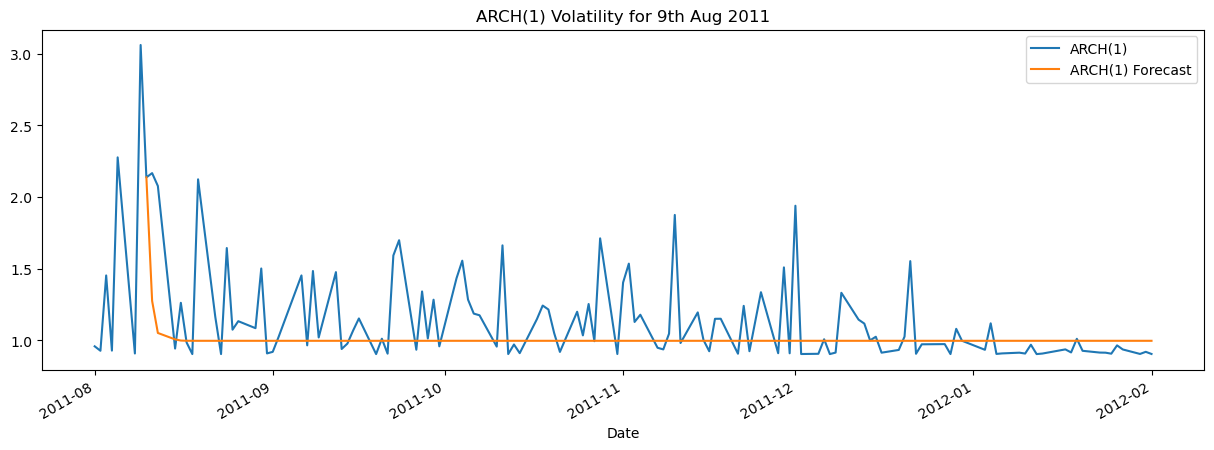

In [40]:
# Plot forecast with in-sample predictions (cut off 2012)

df2.loc['2011-08-01':'2012-02-01'][['ARCH(1)', 'ARCH(1) Forecast']].plot(figsize=(15, 5))
plt.title("ARCH(1) Volatility for 9th Aug 2011");

**The forecast volatility on 9th Aug 2011 starts high, then decreases quickly and converges, as expected.**

**Now do the same for dates surrounding an unusually low return, e.g. 17th Aug 2011.**

In [41]:
# Return index position for 17th Aug 2011

fcast_arch1.variance.index.get_loc('2011-08-17')

408

In [42]:
# What is date 500 timesteps ahead?

df2.index[408 + 500]

Timestamp('2013-08-14 00:00:00')

In [43]:
# Index range of 500 timesteps in df to add volatility forecast for 17th Aug 2011

df2.loc['2011-08-18':'2013-08-14', 'ARCH(1) Forecast Low'] = np.sqrt(fcast_arch1.variance.loc['2011-08-17'].to_numpy())

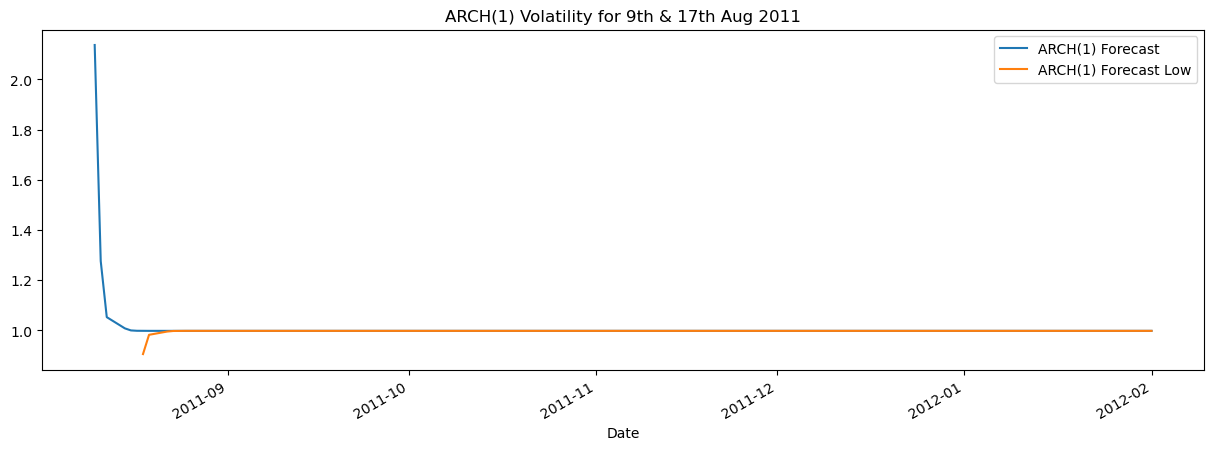

In [44]:
plot_cols = ['ARCH(1) Forecast', 'ARCH(1) Forecast Low']

df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5))
plt.title("ARCH(1) Volatility for 9th & 17th Aug 2011");

**As expected the volatility on 17th Aug 2011 starts low and then increases to converge to the same value, i.e. no matter where volatility starts both dates converge on same value. This constant value is known as the Theoretical Unconditional Variance.**

In [45]:
# Model parameters

res_arch1.params

mu          0.012671
omega       0.818829
alpha[1]    0.177065
Name: params, dtype: float64

In [46]:
# Unconditional variance

res_arch1.params['omega'] / (1 - res_arch1.params['alpha[1]'])

0.9950100810516654

In [47]:
# Check final value of variance for 17th Aug 2011 (low return)

fcast_arch1.variance.loc['2011-08-17'].to_numpy()[-1]

0.9950100810516654

In [48]:
# Check final value of variance for 9th Aug 2011 (high return)

fcast_arch1.variance.loc['2011-08-09'].to_numpy()[-1]

0.9950100810516654

**As you can see the last value for variance for both days of high and low returns matches the unconditional variance value.**

## GARCH(1, 1)

**It is best to start with as parsimonious a GARCH model as you can get, i.e. `p=1` and `q=1`. Calculate the volatility for both 9th and 17th dates in August 2011 to see whether both converge to the same value, and whether the predictions have improved on ARCH results.**

In [49]:
garch11 = arch_model(train['Scaled'], vol='GARCH', p=1, q=1)

In [50]:
res_garch11 = garch11.fit(update_freq=10)

Iteration:     10,   Func. Count:     62,   Neg. LLF: 2269.107952003156
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2269.107941826056
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12


In [51]:
res_garch11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2269.11
Distribution:                  Normal   AIC:                           4546.22
Method:            Maximum Likelihood   BIC:                           4568.11
                                        No. Observations:                 1762
Date:                Fri, Oct 13 2023   Df Residuals:                     1761
Time:                        08:27:50   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0287  1.865e-02      1.538      0.124 [-7.863e-03,6.525e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0469  1.060e-02      4.427  9.560e-06 [2.615e-02,6.770e-02]
alpha[1]       0.1499  2.499e-02      6.000  1.972e-09     [  0.101,  0.199]
beta[1]        0.8021  2.545e-02     31.516 5.231e-218     [  0.752,  0.852]
============================================================================

Covariance estimator: robust
"""

**The Log Likelihood and AIC are much better than before (log likelihood is higher and AIC is lower), so already you know that this model is a better fit.** 

**Note the new `beta[1]` coefficient with a very small p-value, which indicates that it is very significant, which makes sense given the improvement in log likelihood.**

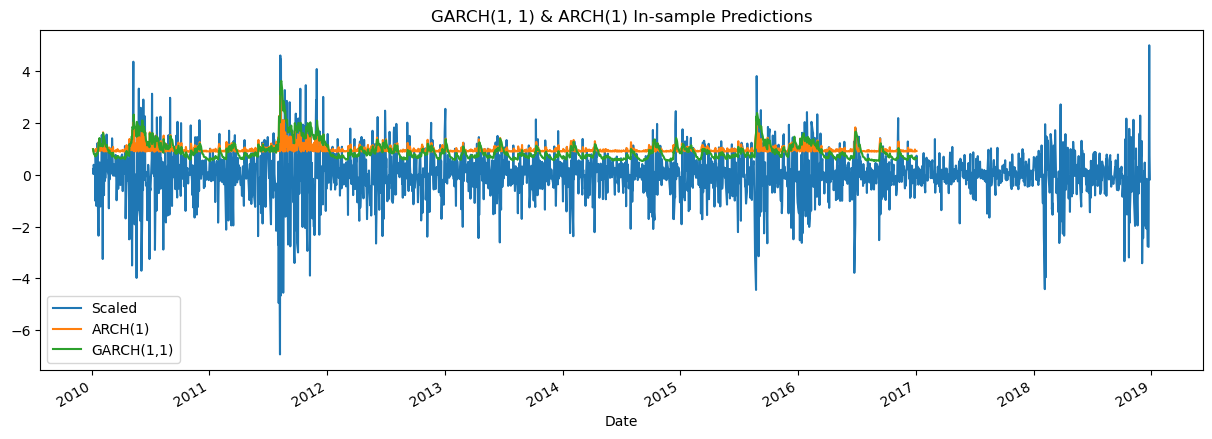

In [52]:
df2['GARCH(1,1)'] = res_garch11.conditional_volatility

df2[['Scaled', 'ARCH(1)', 'GARCH(1,1)']].plot(figsize=(15, 5))
plt.title("GARCH(1, 1) & ARCH(1) In-sample Predictions");

**GARCH results can match the higher values as well as the lower ones, confirming this model a better fit than the ARCH(1) model.**

In [53]:
# Forecast from date of huge return same as before (9th Aug 2011)

fcast_garch11 = res_garch11.forecast(horizon=Ntest, reindex=False, start='2011-08-09')

In [54]:
# Add volatility for 9th Aug 2011 to df

df2.loc['2011-08-10':'2013-08-06', 'GARCH(1,1) Forecast'] = np.sqrt(fcast_garch11.residual_variance.loc['2011-08-09'].to_numpy())

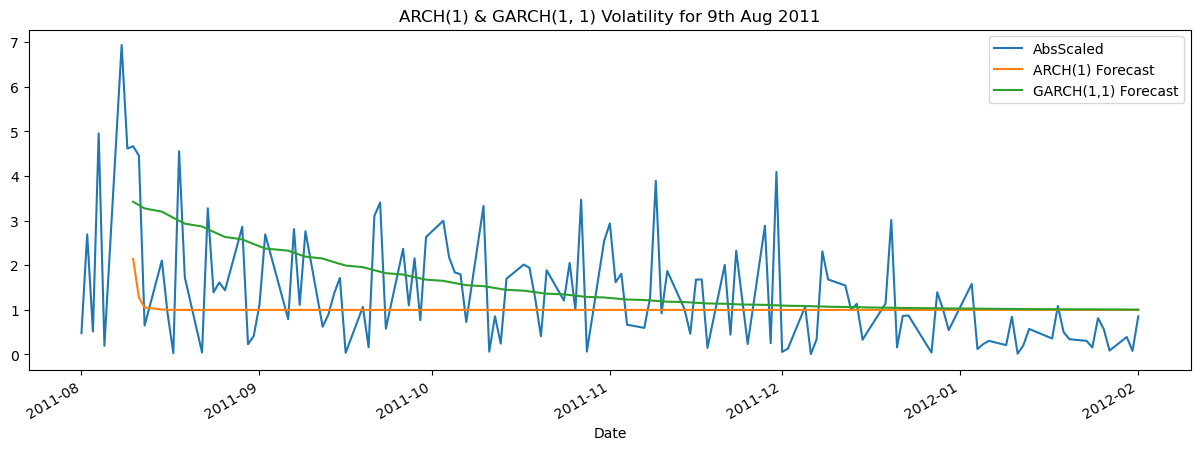

In [56]:
# Create absolute scaled values, i.e. no negatives
df2['AbsScaled'] = df2['Scaled'].abs()

plot_cols = ['AbsScaled', 'ARCH(1) Forecast', 'GARCH(1,1) Forecast']

df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5))
plt.title("ARCH(1) & GARCH(1, 1) Volatility for 9th Aug 2011");

**As expected, the GARCH forecast moves downwards and converges, and it matches the actual data much more closely than ARCH, which could not reach the high values.**

**Notice how quickly the ARCH(1) model converges compared to GARCH - this means the GARCH model is much more persistent.**

### Use T-Distribution type

**The default distribution is 'Normal' but it is common knowledge with Data Scientists that stock returns more resemble the T-distribution.**

In [57]:
garch11t = arch_model(train['Scaled'], vol='GARCH', p=1, q=1, dist='StudentsT')

In [58]:
res_garch11t = garch11t.fit(update_freq=10)

Iteration:     10,   Func. Count:     74,   Neg. LLF: 2230.182985386682
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2230.1797865895423
            Iterations: 14
            Function evaluations: 97
            Gradient evaluations: 14


In [59]:
res_garch11t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2230.18
Distribution:      Standardized Student's t   AIC:                           4470.36
Method:                  Maximum Likelihood   BIC:                           4497.73
                                              No. Observations:                 1762
Date:                      Fri, Oct 13 2023   Df Residuals:                     1761
Time:                              08:43:40   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0471  1.691e-02      2.788  5.309e-03 [1.400e-02,8.028e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0399  9.295e-03      4.296  1.742e-05 [2.171e-02,5.815e-02]
alpha[1]       0.1615  2.507e-02      6.442  1.180e-10     [  0.112,  0.211]
beta[1]        0.8081  2.353e-02     34.350 1.427e-258     [  0.762,  0.854]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.5803      0.733      7.610  2.736e-14 [  4.143,  7.017]
========================================================================

Covariance estimator: robust
"""

**Once again, AIC is lower and log likelihood is higher so we know this model with T-distribution has improved performance.**

**All parameters remain significant and note the distribution model has new parameter `nu` coefficient (degrees of freedom) with very small p-value meaning it is significant.**

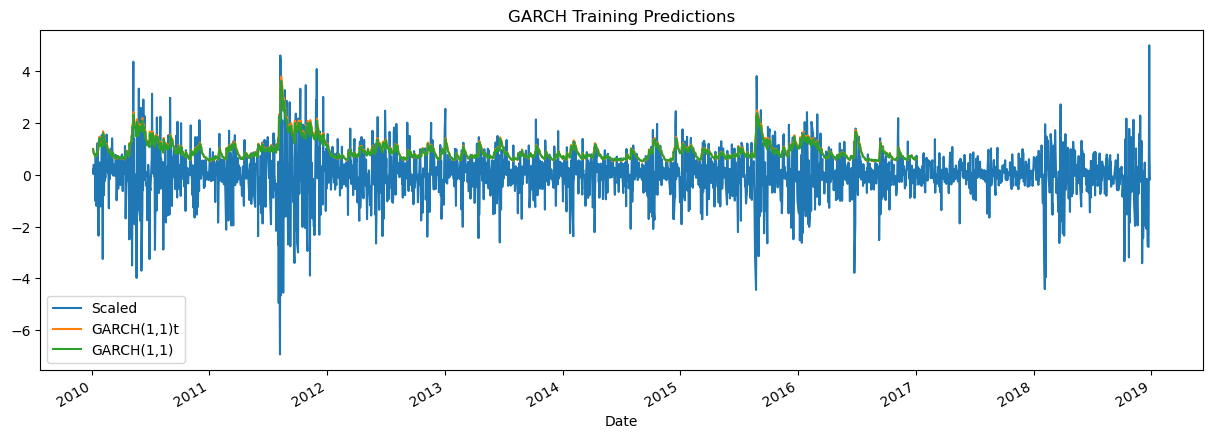

In [60]:
df2['GARCH(1,1)t'] = res_garch11t.conditional_volatility

df2[['Scaled', 'GARCH(1,1)t', 'GARCH(1,1)']].plot(figsize=(15, 5))
plt.title("GARCH Training Predictions");

**It is not easy to see, but it appears that the GARCH model with T-distribution matches the actual data slightly better than the GARCH model with normal distribution. You can see the results more clearly if you zoom in.**

In [61]:
fcast_garch11t = res_garch11t.forecast(horizon=Ntest, reindex=False, start='2011-08-09')

In [62]:
# Add volatility for 9th Aug 2011 to df

df2.loc['2011-08-10':'2013-08-06', 'GARCH(1,1)t Forecast'] = np.sqrt(fcast_garch11t.residual_variance.loc['2011-08-09'].to_numpy())

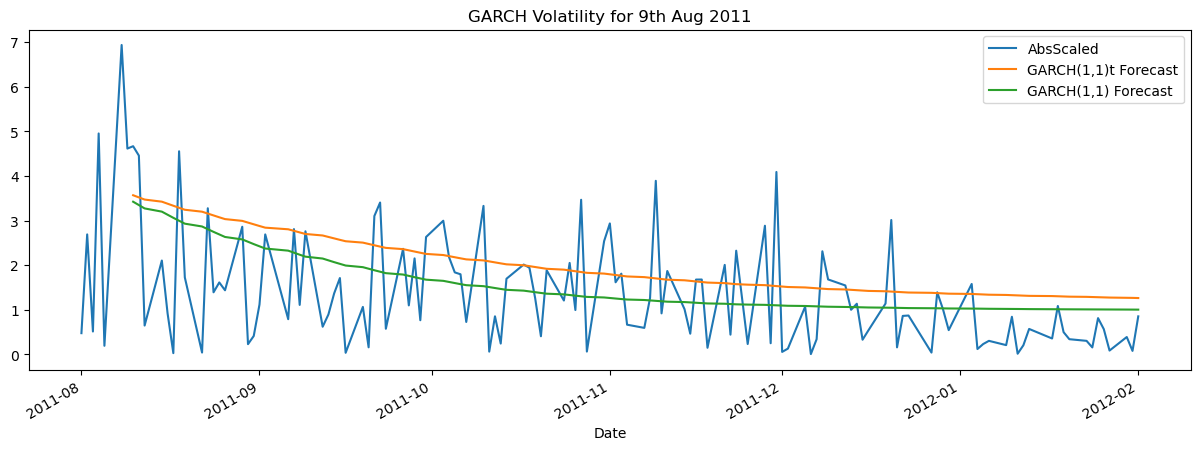

In [63]:
plot_cols = ['AbsScaled', 'GARCH(1,1)t Forecast', 'GARCH(1,1) Forecast']

df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5))
plt.title("GARCH Volatility for 9th Aug 2011");

**The GARCH model with T-distribution has even more persistence and is able to reach a higher value showing it to be the better fit.**

## GARCH(p, q)

**Use a GARCH model with more time lags in `p` and `q` arguments. The values are chosen arbitrarily.**

In [64]:
garchpq = arch_model(train['Scaled'], p=8, q=5, dist='StudentsT')

In [65]:
res_garchpq = garchpq.fit(update_freq=10)

Iteration:     10,   Func. Count:    186,   Neg. LLF: 2611.9082799026037
Iteration:     20,   Func. Count:    369,   Neg. LLF: 2224.5165967237463
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2224.2181169567993
            Iterations: 29
            Function evaluations: 522
            Gradient evaluations: 29


In [66]:
res_garchpq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2224.22
Distribution:      Standardized Student's t   AIC:                           4480.44
Method:                  Maximum Likelihood   BIC:                           4568.02
                                              No. Observations:                 1762
Date:                      Fri, Oct 13 2023   Df Residuals:                     1761
Time:                              09:10:50   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0483  1.715e-02      2.817  4.846e-03 [1.470e-02,8.192e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1008  5.516e-02      1.827  6.774e-02 [-7.349e-03,  0.209]
alpha[1]       0.0744  3.351e-02      2.220  2.643e-02  [8.710e-03,  0.140]
alpha[2]       0.1687  6.307e-02      2.675  7.474e-03  [4.509e-02,  0.292]
alpha[3]   1.9502e-14      0.108  1.801e-13      1.000    [ -0.212,  0.212]
alpha[4]       0.0116  9.808e-02      0.118      0.906    [ -0.181,  0.204]
alpha[5]       0.0370  7.045e-02      0.525      0.599    [ -0.101,  0.175]
alpha[6]       0.0277  5.508e-02      0.503      0.615 [-8.027e-02,  0.136]
alpha[7]       0.0145  6.711e-02      0.216      0.829    [ -0.117,  0.146]
alpha[8]       0.0381  5.693e-02      0.670      0.503 [-7.343e-02,  0.150]
beta[1]        0.5490      0.499      1.100      0.271    [ -0.429,  1.527]
beta[2]    5.7383e-15      0.622  9.219e-15      1.000    [ -1.220,  1.220]
beta[3]        0.0000      0.549      0.000      1.000    [ -1.076,  1.076]
beta[4]    7.9703e-15      0.354  2.253e-14      1.000    [ -0.693,  0.693]
beta[5]    3.0220e-14      0.346  8.727e-14      1.000    [ -0.679,  0.679]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.7008      0.772      7.386  1.511e-13 [  4.188,  7.214]
========================================================================

Covariance estimator: robust
"""

**The Log likelihood has improved slightly (higher), but the AIC score has gone up. Not massively, like with the ARCH model, but this indicates that maybe too many lags were used when training the GARCH(8,5) model. Since the AIC is worse, this model would be rejected in favour of the GARCH(1,1) model.**

**Note that a lot of the large model parameters are not statistically significant.**

In [67]:
# Compare AIC scores from each model

print("ARCH(1) AIC:", res_arch1.aic)
print("GARCH(1,1) AIC:", res_garch11.aic) 
print("GARCH(1,1) with T-distribution AIC:", res_garch11t.aic) 
print("GARCH(8,5) AIC:", res_garchpq.aic)

ARCH(1) AIC: 4921.968057662169
GARCH(1,1) AIC: 4546.215883652112
GARCH(1,1) with T-distribution AIC: 4470.359573179085
GARCH(8,5) AIC: 4480.436233913599


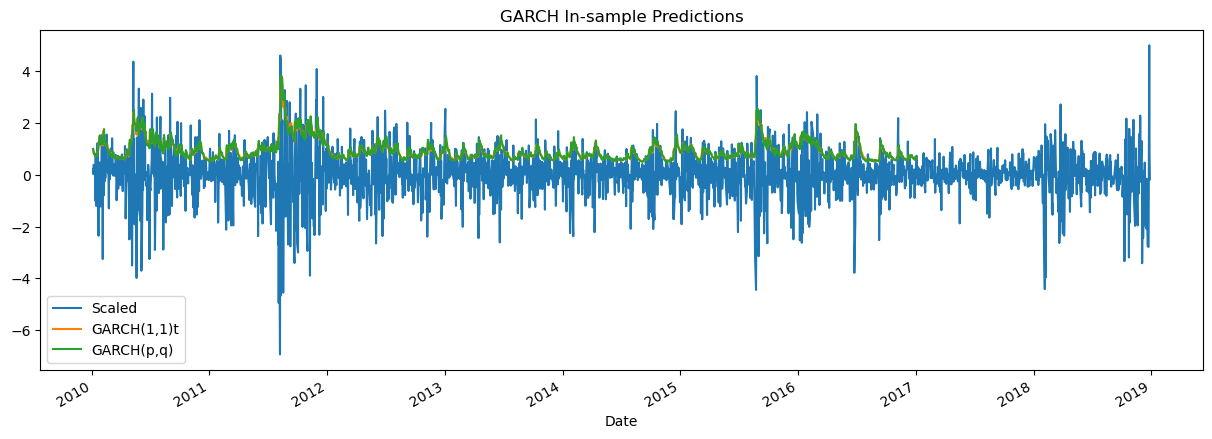

In [68]:
# Store in-sample predictions and plot

df2['GARCH(p,q)'] = res_garchpq.conditional_volatility

df2[['Scaled', 'GARCH(1,1)t', 'GARCH(p,q)']].plot(figsize=(15, 5))
plt.title("GARCH In-sample Predictions");

In [69]:
fcast_garchpq = res_garchpq.forecast(horizon=Ntest, reindex=False, start='2011-08-09')

In [70]:
# Store volatility for 9th Aug 2011 in df

df2.loc['2011-08-10':'2013-08-06', 'GARCH(p,q) Forecast'] = np.sqrt(fcast_garchpq.variance.loc['2011-08-09'].to_numpy())

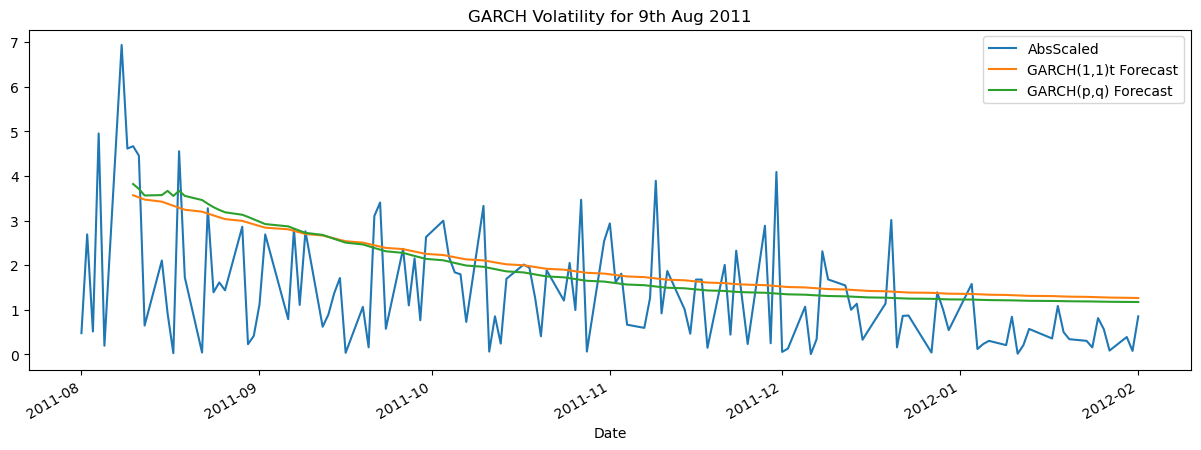

In [71]:
plot_cols = ['AbsScaled', 'GARCH(1,1)t Forecast', 'GARCH(p,q) Forecast']

df2.loc['2011-08-01':'2012-02-01'][plot_cols].plot(figsize=(15, 5))
plt.title("GARCH Volatility for 9th Aug 2011");

**Even though GARCH(8,5) forecast reaches higher volatility value, the behaviour is too similar to GARCH(1,1), which is the more parsimonious model. There is no advantage to using the GARCH(8,5) model.**

### Plot forecast for test set

**So far, you have not predicted on the test set, which is the ultimate test.**

In [72]:
# Boolean series to index df

train_idx = df2.index <= train.index[-1]

test_idx = ~train_idx

In [73]:
# Store in-sample predictions for GARCH(8,5)
df2.loc[train_idx, 'GARCH(p,q) Train'] = res_garchpq.conditional_volatility

# Store test predictions from GARCH(1,1) with T-distribution
df2.loc[test_idx, 'GARCH(1,1)T Test'] = np.sqrt(fcast_garch11t.variance.iloc[-1].to_numpy())

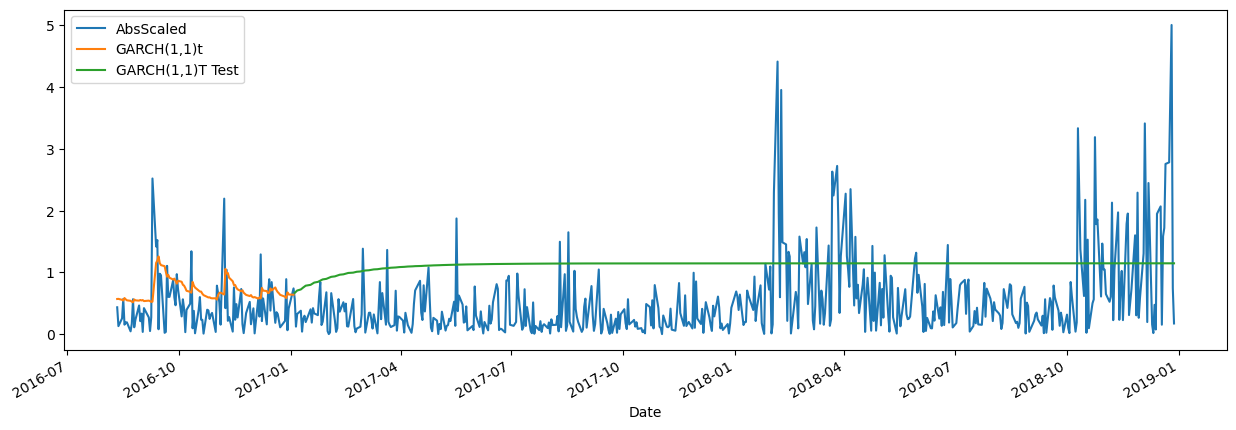

In [74]:
plot_cols = ['AbsScaled', 'GARCH(1,1)t', 'GARCH(1,1)T Test']

df2.iloc[-(Ntest+100):][plot_cols].plot(figsize=(15, 5))
plt.title("GARCH(1,1) Predictions");

**As expected for the test set, the forecast of the variance converges to the unconditional value. The long-term variance does not follow this pattern of course, but the prediction shows the variance to be somewhere in the middle of the high and low returns. The model simply cannot predict volatility fluctuations years ahead.**